## Best classification model for cardio vascular disease prediction 

#### Import needed libraries and dataset

In [49]:
# Import libraries

import pandas as pd
import numpy as np
from scipy import stats

from itertools import combinations

import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')



from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler




In [50]:
df  = pd.read_csv('cardio_data_processed.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [52]:
df.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [53]:
# Checking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [54]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [55]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


We immediately notice that the age takes large values, which is because it is given in days

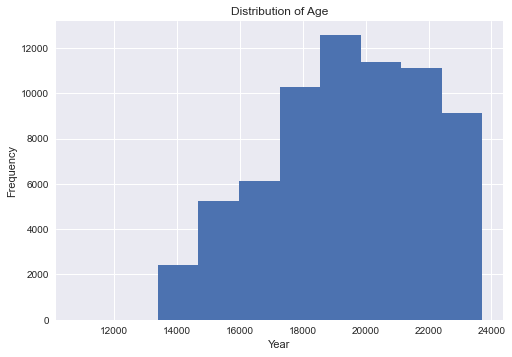

In [56]:
# Visualize yr_renovated post 1900 (to not show all the 0 values)
df['age'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

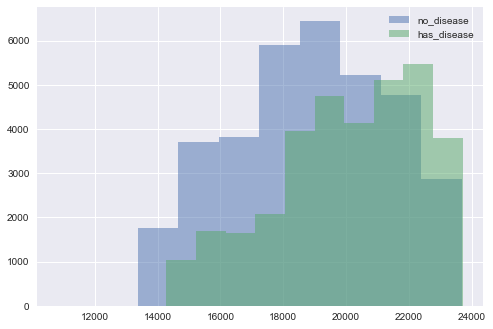

In [57]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [58]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']

has_disease.mean() - no_disease.mean() 

1180.1302938790323

In [59]:
no_disease.describe()

count    34533.000000
mean     18880.051400
std       2471.865669
min      10798.000000
25%      16840.000000
50%      19004.000000
75%      20868.000000
max      23678.000000
Name: age, dtype: float64

In [60]:
has_disease.describe()

count    33672.000000
mean     20060.181694
std       2317.385090
min      14275.000000
25%      18387.000000
50%      20387.500000
75%      21902.000000
max      23713.000000
Name: age, dtype: float64

We can see that on average the people with CV diseases are older by 1180 days, which is approximately 3.24 years. When comparing the minimal values we see that the no disease group has a larger range in age and a corresponding higher SD. Let us see the left-hand tail of the histogramm 

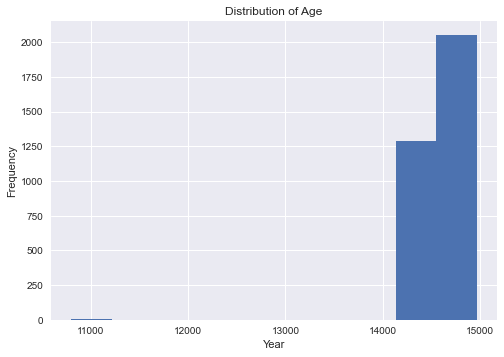

In [61]:
df[df['age'] < 15000]['age'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

In [62]:
df[df['age'] < 14000]['age']

6057     10878
21765    10798
29871    10859
54477    10964
Name: age, dtype: int64

And we find our outliers, 4 case with age less then 11 000 days. We should remove these manually. We could apply a function for the age column to remove all entries where the value - mean > 3 x SD. But this will only partially since for value 10798,  the mean(19462.667737) - 10798 is 8,664.67, while the 3 x SD is 86,556.41, but such are rule would not remove the other three, since their mean - value difference is less then 3 times the SD. Visually these for rows go together so it makes sense to remove all of them. 

In [63]:
df = df[df['age'] > 11000]

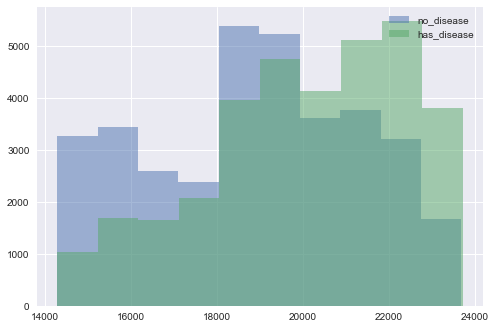

In [64]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [65]:
no_disease = df[df['cardio'] == 0]['age']
has_disease = df[df['cardio'] == 1]['age']

has_disease.mean() - no_disease.mean() 

1179.2029225216102

In [66]:
no_disease.describe()

count    34529.000000
mean     18880.978771
std       2470.506499
min      14282.000000
25%      16840.000000
50%      19005.000000
75%      20869.000000
max      23678.000000
Name: age, dtype: float64

In [67]:
has_disease.describe()

count    33672.000000
mean     20060.181694
std       2317.385090
min      14275.000000
25%      18387.000000
50%      20387.500000
75%      21902.000000
max      23713.000000
Name: age, dtype: float64

Even though we removed our outliers there is still a 3.2 year difference between the means. next question is: is this difference a problem, a.k.a. is it significant. Lets do a t-test on the two age groups with and without cv diseases. 

Check the homogeneity and normality assumptions. 

In [68]:
stats.levene(has_disease, no_disease)

LeveneResult(statistic=253.626236466137, pvalue=5.331743072405681e-57)

In [69]:
stats.shapiro(has_disease)

c:\Users\ddash\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.959601879119873, pvalue=0.0)

In [70]:
stats.shapiro(no_disease)

ShapiroResult(statistic=0.9695900082588196, pvalue=0.0)

In [71]:
stats.ttest_ind(no_disease, has_disease)

Ttest_indResult(statistic=-64.25531452400004, pvalue=0.0)

So me learn that our data is bias in terms of age, older people have cv-diseases. This might be due to the fact that such conditions are more frequently diagnosed with the increase of age. Never the less it is a drawback of the dataset that we need to be aware of.  

In [72]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

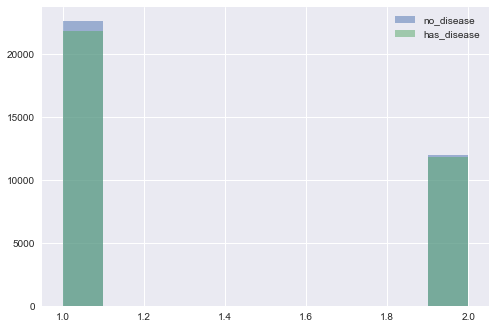

In [73]:
no_disease = df[df['cardio'] == 0]['gender']
has_disease = df[df['cardio'] == 1]['gender']


plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

The data is also bias in terms of gender, although the distribution is the same for both values of our target (the no disease and has disease groups)

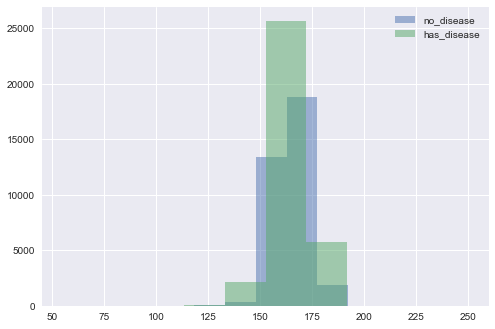

In [74]:
no_disease = df[df['cardio'] == 0]['height']
has_disease = df[df['cardio'] == 1]['height']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

On average people with cv diseases are taller, but this most likely is due to the well known correlation of height with weight, which intern is a variable related with factors such as obesity  

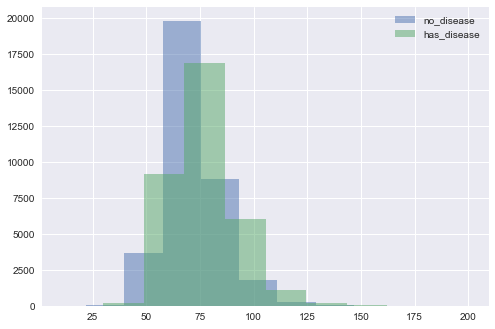

In [75]:
no_disease = df[df['cardio'] == 0]['weight']
has_disease = df[df['cardio'] == 1]['weight']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

Indeed people with cv diseases are heavier on average, there might be some outliers her as well as in the height column lets apply the 3 X SD rule for this two variables

In [76]:
def remove_outliers(df,variables):
    '''removes entries with z-score above 3 for specific columns'''
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [77]:
df = remove_outliers(df,['height', 'weight'])

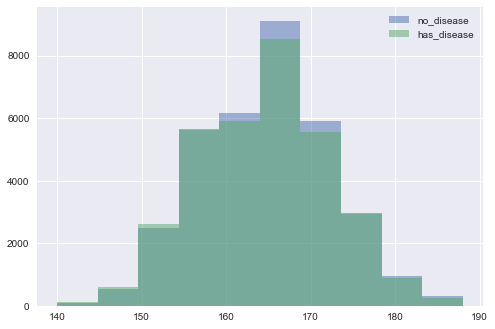

In [79]:
no_disease = df[df['cardio'] == 0]['height']
has_disease = df[df['cardio'] == 1]['height']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

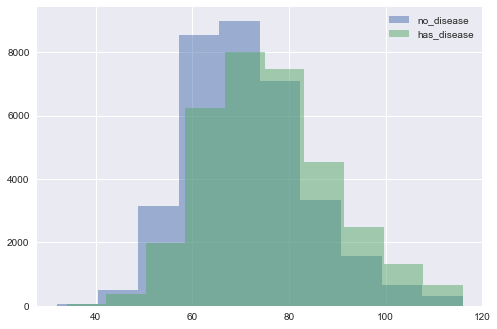

In [80]:
no_disease = df[df['cardio'] == 0]['weight']
has_disease = df[df['cardio'] == 1]['weight']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [81]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

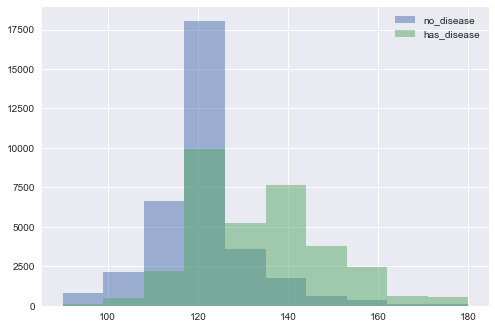

In [82]:
no_disease = df[df['cardio'] == 0]['ap_hi']
has_disease = df[df['cardio'] == 1]['ap_hi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

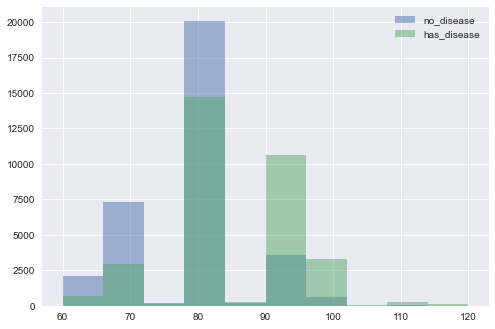

In [83]:
no_disease = df[df['cardio'] == 0]['ap_lo']
has_disease = df[df['cardio'] == 1]['ap_lo']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

These are the upper and lower ranges of the blood pressure. Let see if we can derive a column from them that will give the range.

In [84]:
df['ap_range'] = df['ap_hi'] - df['ap_lo']

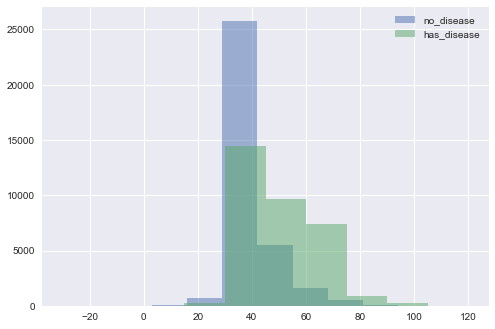

In [85]:
no_disease = df[df['cardio'] == 0]['ap_range']
has_disease = df[df['cardio'] == 1]['ap_range']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

This variable looks more meaningful in comparison to ap_lo, although we will latter see if it is more informative then ap_hi. Lets clean the arterial pressure variables from outliers using our function. 

In [86]:
df = remove_outliers(df,['ap_lo', 'ap_hi', 'ap_range'])

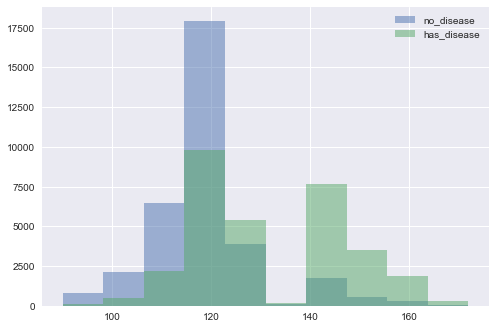

In [87]:
no_disease = df[df['cardio'] == 0]['ap_hi']
has_disease = df[df['cardio'] == 1]['ap_hi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

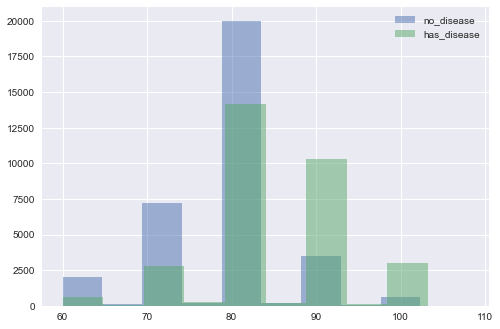

In [88]:
no_disease = df[df['cardio'] == 0]['ap_lo']
has_disease = df[df['cardio'] == 1]['ap_lo']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

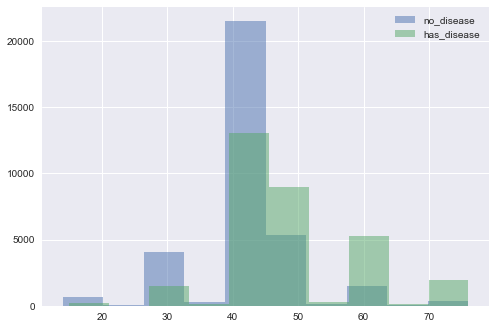

In [89]:
no_disease = df[df['cardio'] == 0]['ap_range']
has_disease = df[df['cardio'] == 1]['ap_range']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [90]:
len(df)

65392

In [91]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded', 'ap_range'],
      dtype='object')

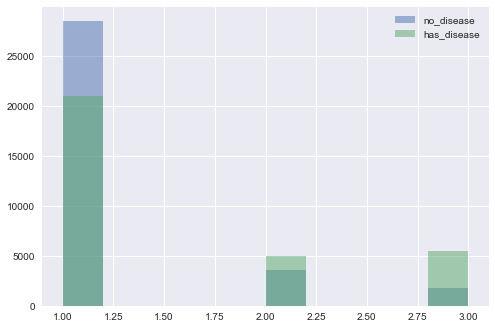

In [92]:
no_disease = df[df['cardio'] == 0]['cholesterol']
has_disease = df[df['cardio'] == 1]['cholesterol']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

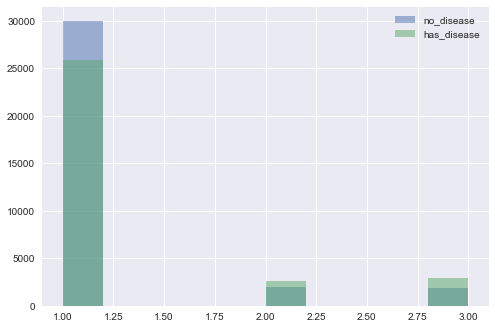

In [94]:
no_disease = df[df['cardio'] == 0]['gluc']
has_disease = df[df['cardio'] == 1]['gluc']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

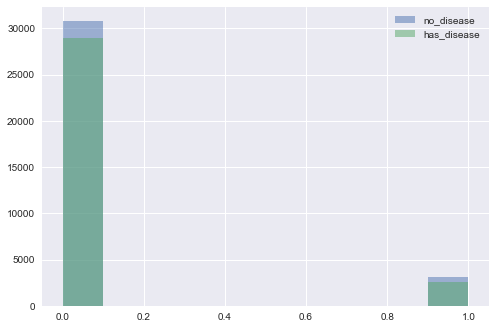

In [95]:
no_disease = df[df['cardio'] == 0]['smoke']
has_disease = df[df['cardio'] == 1]['smoke']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

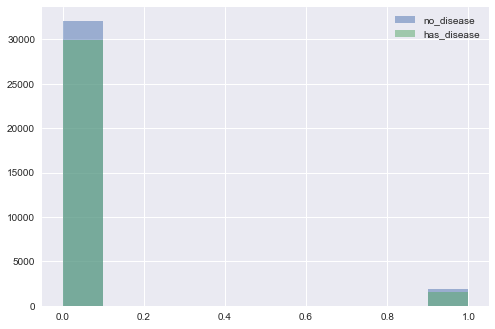

In [96]:
no_disease = df[df['cardio'] == 0]['alco']
has_disease = df[df['cardio'] == 1]['alco']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

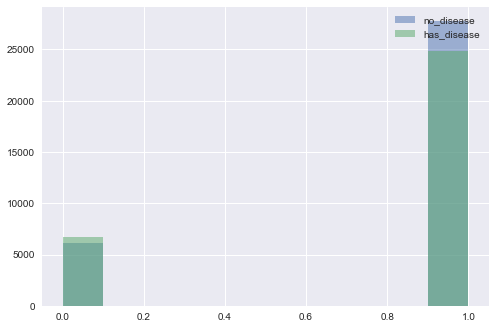

In [97]:
no_disease = df[df['cardio'] == 0]['active']
has_disease = df[df['cardio'] == 1]['active']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

The is a significant skew in the data regarding the last 5 variables. Generally we may conclude that for the most part our data include people with normal cholesterol and glucose levels that by in large are physically active, do not smoke or consume alcohol. Let us see the distribution of the target itself.    

Text(0.5, 0, '0: No disease, 2: Has disease')

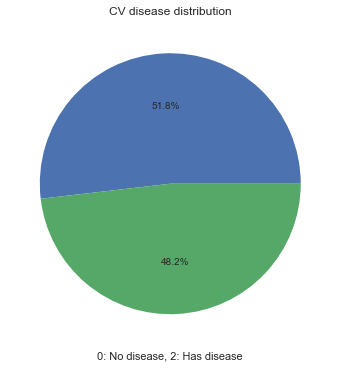

In [98]:
plt.figure(figsize=(10,6))
plt.pie(df['cardio'].value_counts(),autopct='%1.1f%%')
plt.title("CV disease distribution")
plt.xlabel('0: No disease, 2: Has disease')

Our target variable is almost perfectly balanced yet some of the variables are highly skewed.  Note that all these variables have teh drawback that they are very vague with no clear definition of what is met as a physically active person. Also there is no doze related to alcohol consumption or smoking, which we would imagine matters fro the presence/absence of cv diseases.      

Let us compile the physically active, smoking and alcohol variables into a third variable, which we shall call "lifestyle". First let switch the values in the physically active column so that 0 indicate active and 1 indicate inactive

In [111]:
df['inactive'] = df['active'] - 1
df['inactive'] = df['inactive'].replace(-1, 1)

In [115]:
df['lifestyle'] = df['inactive'] + df['smoke'] + df['alco']

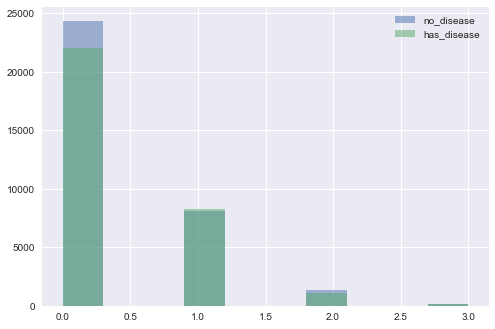

In [116]:
no_disease = df[df['cardio'] == 0]['lifestyle']
has_disease = df[df['cardio'] == 1]['lifestyle']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [118]:
df['lifestyle'].value_counts() 

0    46378
1    16384
2     2377
3      253
Name: lifestyle, dtype: int64

This variable looks better, more then 20% of the people have at least one of the three bad habits, 2 300 have two and only 253 are smoking, drinking and inactive  

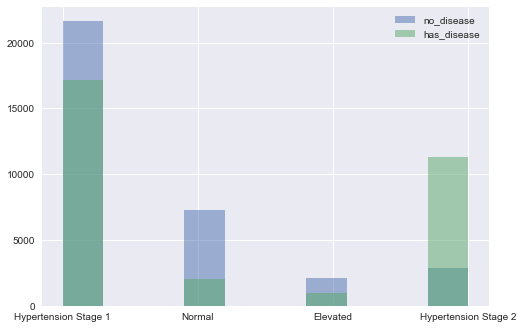

In [119]:
no_disease = df[df['cardio'] == 0]['bp_category']
has_disease = df[df['cardio'] == 1]['bp_category']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

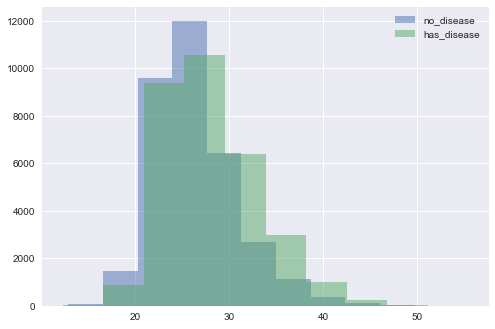

In [122]:
no_disease = df[df['cardio'] == 0]['bmi']
has_disease = df[df['cardio'] == 1]['bmi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [124]:
df = remove_outliers(df, ['bmi'])

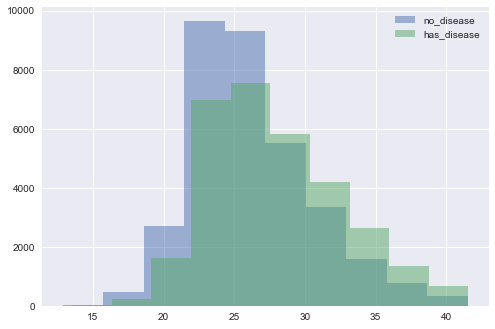

In [125]:
no_disease = df[df['cardio'] == 0]['bmi']
has_disease = df[df['cardio'] == 1]['bmi']

plt.hist(no_disease, alpha=0.5, label='no_disease')
plt.hist(has_disease, alpha=0.5, label='has_disease')
plt.legend(loc='upper right')
plt.show()

In [129]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded', 'ap_range', 'inactive',
       'lifestyle'],
      dtype='object')

In [133]:
df = df.drop(['age_years', 'inactive'], axis=1)

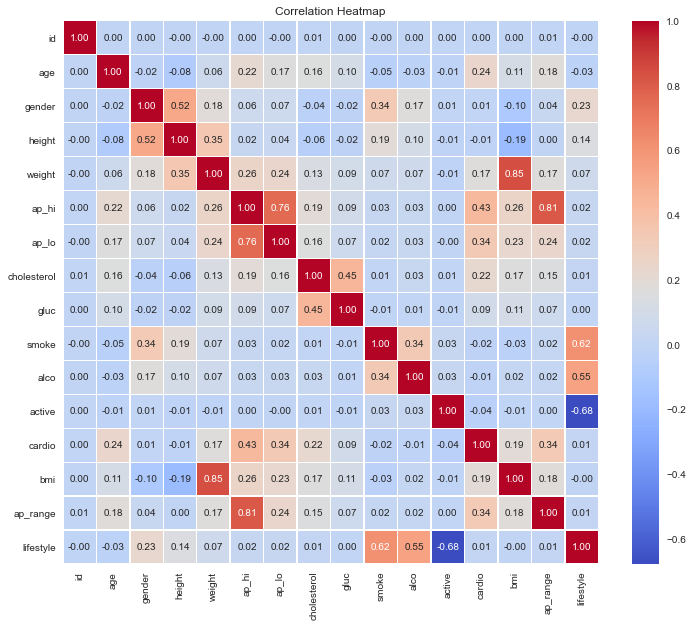

In [134]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

From the corr plot we can see that ap_hi has the strongest correlation with the target variable, better then that of ap_lo or the ap_range variable we defined. Since these three are highly correlated with each other, we shall use ap_hi. Weight and bmi are strongly correlated and the latter has in turn a higher correlation with teh target, hence we will use the bmi. Finally our lifestyle variable has an insignificant positive correlation with the target. Seeming smoke, alco and especially active work better on their own.    